In [175]:
import pandas as pd, numpy as np, seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
# MPL Settings
import matplotlib as mpl,  matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

grey = '#808080'
darkgrey = '#505050'
# (http://www.color-hex.com/color/505050)

mpl.rcParams['axes.linewidth'] = 0.3
mpl.rcParams['axes.edgecolor'] = grey
mpl.rcParams['xtick.color'] = grey
mpl.rcParams['ytick.color'] = grey
mpl.rcParams['text.color'] = darkgrey
mpl.rcParams['axes.labelcolor'] = darkgrey
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['figure.dpi'] = 300

In [108]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [109]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [110]:
# missing = star_wars[star_wars.isnull(star_wars["RespondentID"])]
# missing.head()
star_wars.shape

(1187, 38)

In [111]:
star_wars.describe()

,RespondentID
count,1.186000e+03
mean,3.290128e+09
std,1.055639e+06
min,3.288373e+09
25%,3.289451e+09
50%,3.290147e+09
75%,3.290814e+09
max,3.292880e+09


In [112]:
true_ids = pd.notnull(star_wars["RespondentID"])
# true_ids

In [113]:
star_wars.dropna(subset=['RespondentID'], inplace=True) 

In [114]:
yes_no = {
    "Yes": True,
    "No": False
}

In [115]:
# all column names with counts
star_wars.count()

RespondentID                                                                                                                                     1186
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                             836
Which of the following Star Wars films have you seen? Please select all that apply.                                                               673
Unnamed: 4                                                                                                                                        571
Unnamed: 5                                                                                                                                        550
Unnamed: 6                                                                                          

In [116]:
# Converting to Boolean
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = \
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = \
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [117]:
list(star_wars.columns[3:9])

['Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8']

In [118]:
# Renaming columns
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    'Unnamed: 4': "seen_2",
    'Unnamed: 5': "seen_3",
    'Unnamed: 6': "seen_4",
    'Unnamed: 7': "seen_5",
    'Unnamed: 8': "seen_6"
})

In [119]:
for c in list(star_wars.columns[3:9]):
    print(star_wars[c].value_counts())

Star Wars: Episode I  The Phantom Menace    673
Name: seen_1, dtype: int64
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
Star Wars: Episode IV  A New Hope    607
Name: seen_4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
Name: seen_5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
Name: seen_6, dtype: int64


In [36]:
# HOW TO SLICE BY ROW AND COL NUMBERS
print(star_wars.iloc[:5,[3,4]])

                                     seen_1  \
1  Star Wars: Episode I  The Phantom Menace   
2                                       NaN   
3  Star Wars: Episode I  The Phantom Menace   
4  Star Wars: Episode I  The Phantom Menace   
5  Star Wars: Episode I  The Phantom Menace   

                                        seen_2  
1  Star Wars: Episode II  Attack of the Clones  
2                                          NaN  
3  Star Wars: Episode II  Attack of the Clones  
4  Star Wars: Episode II  Attack of the Clones  
5  Star Wars: Episode II  Attack of the Clones  


In [37]:
# same result as above with index
star_wars.ix[:5,['seen_1', 'seen_2']] 

/Users/richard.mcmaster/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,seen_1,seen_2
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones
2,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones


In [70]:
# all rows by col name (or could use .loc)
star_wars.ix[:,'seen_2'] 

/Users/richard.mcmaster/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


1       Star Wars: Episode II  Attack of the Clones
2                                               NaN
3       Star Wars: Episode II  Attack of the Clones
4       Star Wars: Episode II  Attack of the Clones
5       Star Wars: Episode II  Attack of the Clones
6       Star Wars: Episode II  Attack of the Clones
7       Star Wars: Episode II  Attack of the Clones
8       Star Wars: Episode II  Attack of the Clones
9       Star Wars: Episode II  Attack of the Clones
10      Star Wars: Episode II  Attack of the Clones
11                                              NaN
12                                              NaN
13      Star Wars: Episode II  Attack of the Clones
14      Star Wars: Episode II  Attack of the Clones
15      Star Wars: Episode II  Attack of the Clones
16      Star Wars: Episode II  Attack of the Clones
17                                              NaN
18      Star Wars: Episode II  Attack of the Clones
19      Star Wars: Episode II  Attack of the Clones
20      Star

In [71]:
# all rows by number
print(star_wars.iloc[:,[4]]) 

                                           seen_2
1     Star Wars: Episode II  Attack of the Clones
2                                             NaN
3     Star Wars: Episode II  Attack of the Clones
4     Star Wars: Episode II  Attack of the Clones
5     Star Wars: Episode II  Attack of the Clones
6     Star Wars: Episode II  Attack of the Clones
7     Star Wars: Episode II  Attack of the Clones
8     Star Wars: Episode II  Attack of the Clones
9     Star Wars: Episode II  Attack of the Clones
10    Star Wars: Episode II  Attack of the Clones
11                                            NaN
12                                            NaN
13    Star Wars: Episode II  Attack of the Clones
14    Star Wars: Episode II  Attack of the Clones
15    Star Wars: Episode II  Attack of the Clones
16    Star Wars: Episode II  Attack of the Clones
17                                            NaN
18    Star Wars: Episode II  Attack of the Clones
19    Star Wars: Episode II  Attack of the Clones


In [120]:
# row and individual columns by number
print(star_wars.iloc[:5,[3,4]]) 

                                     seen_1  \
1  Star Wars: Episode I  The Phantom Menace   
2                                       NaN   
3  Star Wars: Episode I  The Phantom Menace   
4  Star Wars: Episode I  The Phantom Menace   
5  Star Wars: Episode I  The Phantom Menace   

                                        seen_2  
1  Star Wars: Episode II  Attack of the Clones  
2                                          NaN  
3  Star Wars: Episode II  Attack of the Clones  
4  Star Wars: Episode II  Attack of the Clones  
5  Star Wars: Episode II  Attack of the Clones  


In [121]:
# rows and column range by number
print(star_wars.iloc[:1,3:9]) 

                                     seen_1  \
1  Star Wars: Episode I  The Phantom Menace   

                                        seen_2  \
1  Star Wars: Episode II  Attack of the Clones   

                                        seen_3  \
1  Star Wars: Episode III  Revenge of the Sith   

                              seen_4  \
1  Star Wars: Episode IV  A New Hope   

                                         seen_5  \
1  Star Wars: Episode V The Empire Strikes Back   

                                     seen_6  
1  Star Wars: Episode VI Return of the Jedi  


In [122]:
print(star_wars.ix[:5,"seen_1"])

1    Star Wars: Episode I  The Phantom Menace
2                                         NaN
3    Star Wars: Episode I  The Phantom Menace
4    Star Wars: Episode I  The Phantom Menace
5    Star Wars: Episode I  The Phantom Menace
Name: seen_1, dtype: object


/Users/richard.mcmaster/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [123]:
print(star_wars.ix[:5,1:2])

   Have you seen any of the 6 films in the Star Wars franchise?
1                                               True           
2                                              False           
3                                               True           
4                                               True           
5                                               True           


/Users/richard.mcmaster/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [124]:
print(star_wars.ix[:5,3:9])

                                     seen_1  \
1  Star Wars: Episode I  The Phantom Menace   
2                                       NaN   
3  Star Wars: Episode I  The Phantom Menace   
4  Star Wars: Episode I  The Phantom Menace   
5  Star Wars: Episode I  The Phantom Menace   

                                        seen_2  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   

                                        seen_3  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   

                              seen_4  \
1  Star Wars: Episode IV  A New Hope   
2                                Na

/Users/richard.mcmaster/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [125]:
# USE THIS!!!! (.loc for names, .ix for mixture)
print(star_wars.iloc[:5,3:9]) 

### VERY IMPORTANT - if not using print(), output is prettier but mistakes like
### double space between words might be corrected.


                                     seen_1  \
1  Star Wars: Episode I  The Phantom Menace   
2                                       NaN   
3  Star Wars: Episode I  The Phantom Menace   
4  Star Wars: Episode I  The Phantom Menace   
5  Star Wars: Episode I  The Phantom Menace   

                                        seen_2  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   

                                        seen_3  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   

                              seen_4  \
1  Star Wars: Episode IV  A New Hope   
2                                Na

In [103]:
dict_1 = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False # needed module reference, not just name
        }


star_wars["seen_1"] = star_wars["seen_1"].map(dict_1)

In [50]:
dict_2 = {
    "Star Wars: Episode II  Attack of the Clones": True,
    np.NaN: False # needed module reference, not just name
        }


star_wars["seen_2"] = star_wars["seen_2"].map(dict_2)

In [51]:
dict_3 = {
    "Star Wars: Episode III  Revenge of the Sith": True,
    np.NaN: False # needed module reference, not just name
        }


star_wars["seen_3"] = star_wars["seen_3"].map(dict_3)

In [86]:
dict_4 = {
    "Star Wars: Episode IV  A New Hope": True,
    np.NaN: False
        }


star_wars["seen_4"] = star_wars["seen_4"].map(dict_4)

In [87]:
dict_5 = {
    "Star Wars: Episode V The Empire Strikes Back": True,
    np.NaN: False # needed module reference, not just name
        }


star_wars["seen_5"] = star_wars["seen_5"].map(dict_5)

In [127]:
# star_wars["seen_6_copy"] = star_wars["seen_6"]
# star_wars.iloc[:5,3:9]
star_wars.shape
star_wars.iloc[:5,[3,4, 5, 6, 7, 8]]

(1186, 38)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [128]:
star_wars["seen_6_copy"] = star_wars["seen_6"]
star_wars.iloc[:15,[3,4, 5, 6, 7, 8, 38]]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,seen_6_copy
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi
6,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi
7,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi
8,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi
9,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode VI Return of the Jedi
10,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,NaN


In [129]:
# There is no need for a complicated mapping - to recode the 'seen_' answers to boolean, just use following:
seen_cols = [col for col in star_wars.columns if 'seen_' in col]
seen_cols
star_wars[seen_cols] = star_wars[seen_cols].notnull().astype('bool')
star_wars[seen_cols].head()

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'seen_6_copy']

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,seen_6_copy
1,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False
4,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True


In [130]:
# ANOTHER GOOD COLUMN REFERENCE METHOD
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float) 

In [132]:
# More renaming
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': "rank_1",
    'Unnamed: 10': "rank_2",
    'Unnamed: 11': "rank_3",
    'Unnamed: 12': "rank_4",
    'Unnamed: 13': "rank_5",
    'Unnamed: 14': "rank_6"
})

In [133]:
print(star_wars.iloc[:5,9:15])

   rank_1  rank_2  rank_3  rank_4  rank_5  rank_6
1     3.0     2.0     1.0     4.0     5.0     6.0
2     NaN     NaN     NaN     NaN     NaN     NaN
3     1.0     2.0     3.0     4.0     5.0     6.0
4     5.0     6.0     1.0     2.0     4.0     3.0
5     5.0     4.0     6.0     2.0     1.0     3.0


In [134]:
# average for multiple columns
star_wars.iloc[:,9:15].mean() 

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64

<BarContainer object of 4 artists>

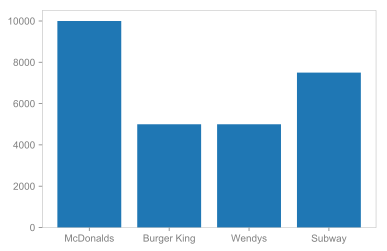

In [136]:
# Bar Chart example

names = ["McDonalds", "Burger King", "Wendys", "Subway"]
patrons = [10000, 5000, 5000, 7500]
x = names

plt.bar(x, patrons)
plt.show()


In [137]:
all_ranks = star_wars.iloc[:,9:15].mean()

In [138]:
print(all_ranks)

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64


['EPI', 'EPII', 'EPIII', 'EPIV', 'EPV', 'EPVI']

<BarContainer object of 6 artists>

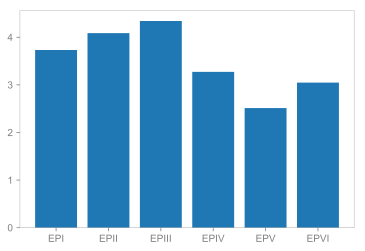

In [172]:
x = [0, 1, 2, 3, 4, 5]
ep_map = {
    0: 'EPI',
    1: 'EPII',
    2: 'EPIII',
    3: 'EPIV',
    4: 'EPV',
    5: 'EPVI',
}
# Xx = tuple(x).map(ep_map)
ep_names = [ep_map[i] for i in x]
ep_names
plt.bar(ep_names, all_ranks) 
plt.show()

Goes with the prevailing critical opinion, although interestingly Sith comes out worst.

In [140]:
all_seen = star_wars.iloc[:,3:9].sum()

In [141]:
all_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

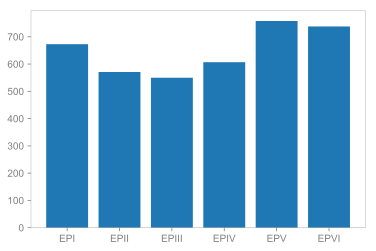

In [173]:
x = [0, 1, 2, 3, 4, 5]

plt.bar(ep_names, all_seen) 
plt.show()

Empire is also most-seen - due to repeat viewings of preferred film.

In [143]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [144]:
males.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,...,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),seen_6_copy
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,False
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central,False
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True


In [145]:
males_seen = males.iloc[:,3:9].sum()
females_seen = females.iloc[:,3:9].sum()

<BarContainer object of 6 artists>

Text(0.5,1,'Males Seen')

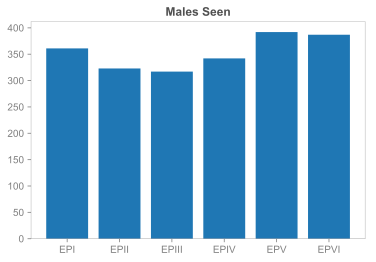

Text(0.5,1,'Females Seen')

<BarContainer object of 6 artists>

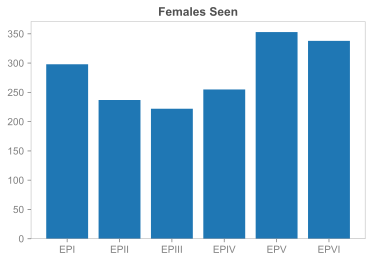

In [174]:
plt.bar(ep_names, males_seen) 
plt.title("Males Seen",fontweight="bold")
plt.show()
plt.title("Females Seen",fontweight="bold")`
plt.bar(ep_names, females_seen) 
plt.show()

In [181]:
del seen_cols[-1]
seen_cols

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

sum                                   
       seen_1 seen_2 seen_3 seen_4 seen_5 seen_6
Gender                                          
Female  298.0  237.0  222.0  255.0  353.0  338.0
Male    361.0  323.0  317.0  342.0  392.0  387.0
All     659.0  560.0  539.0  597.0  745.0  725.0

Gender      Female   Male    All
sum seen_1   298.0  361.0  659.0
    seen_2   237.0  323.0  560.0
    seen_3   222.0  317.0  539.0
    seen_4   255.0  342.0  597.0
    seen_5   353.0  392.0  745.0
    seen_6   338.0  387.0  725.0

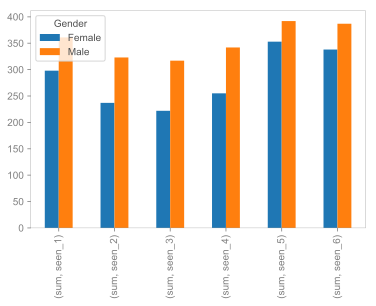

In [186]:
# Pivot and Transpose for viewability
pd.pivot_table(star_wars,index=["Gender"],values=seen_cols,aggfunc=[np.sum],margins=True)
pd.pivot_table(star_wars,index=["Gender"],values=seen_cols,aggfunc=[np.sum],margins=True).transpose()
pd.pivot_table(star_wars,index=["Gender"],values=seen_cols,aggfunc=[np.sum]).transpose().plot(kind='bar')

In [149]:
males_rank = males.iloc[:,9:15].sum()
females_rank = females.iloc[:,9:15].sum()

<BarContainer object of 6 artists>

Text(0.5,1,'Males Rank')

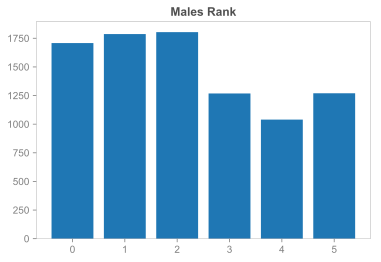

<BarContainer object of 6 artists>

Text(0.5,1,'Females Rank')

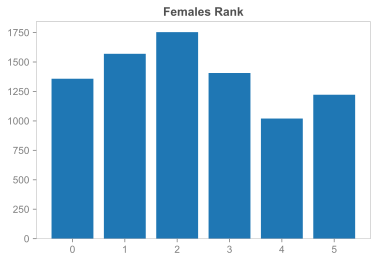

In [167]:
plt.bar(x, males_rank)
plt.title("Males Rank",fontweight="bold")
plt.show()
plt.bar(x, females_rank) 
plt.title("Females Rank",fontweight="bold")
plt.show()

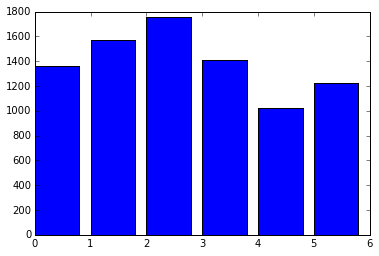

In [49]:
plt.bar(x, females_rank) 
plt.show()

When split by gender, the rankings are the same but the differences are more pronounced.

In [151]:
star_wars['Education'].unique()

array(['High school degree', 'Bachelor degree',
       'Some college or Associate degree', nan, 'Graduate degree',
       'Less than high school degree'], dtype=object)

In [163]:
star_wars['Location (Census Region)'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

In [162]:
star_wars['Which character shot first?'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [155]:
star_wars['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'].unique()

array(['Very favorably', nan, 'Somewhat favorably',
       'Neither favorably nor unfavorably (neutral)',
       'Somewhat unfavorably', 'Unfamiliar (N/A)', 'Very unfavorably'],
      dtype=object)

In [156]:
star_wars.groupby(['Education'])['seen_1'].sum()

Education
Bachelor degree                     206.0
Graduate degree                     179.0
High school degree                   57.0
Less than high school degree          3.0
Some college or Associate degree    211.0
Name: seen_1, dtype: float64

In [202]:
seen_edu_table = pd.pivot_table(star_wars,index=["Education"],values=seen_cols, \
                          aggfunc=[np.sum, np.mean],fill_value=0, margins=True)
seen_edu_table

sum                                     \
                                 seen_1 seen_2 seen_3 seen_4 seen_5 seen_6   
Education                                                                    
Bachelor degree                     206    170    163    195    243    234   
Graduate degree                     179    149    139    163    207    201   
High school degree                   57     48     48     53     61     60   
Less than high school degree          3      3      3      3      3      3   
Some college or Associate degree    211    186    183    180    227    223   
All                                 656    556    536    594    741    721   

                                      mean                                \
                                    seen_1    seen_2    seen_3    seen_4   
Education                                                                  
Bachelor degree                   0.641745  0.529595  0.507788  0.607477   
Graduate degree                   0.650909  0.541818  0.505455  0.592727   
High school degree                0.542857  0.457143  0.457143  0.504762   
Less than high school degree      0.428571  0.428571  0.428571  0.428571   
Some college or Associate degree  0.643293  0.567073  0.557927  0.548780   
All                               0.633205  0.536680  0.517375  0.573359   

                                                      
                                    seen_5    seen_6  
Education                                             
Bachelor degree                   0.757009  0.728972  
Graduate degree                   0.752727  0.730909  
High school degree                0.580952  0.571429  
Less than high school degree      0.428571  0.428571  
Some college or Associate degree  0.692073  0.679878  
All                               0.715251  0.695946

In [196]:
edu_seen_perc = pd.pivot_table(star_wars,index=["Education"],values=seen_cols, \
                          aggfunc=[np.sum],fill_value=0).apply(lambda x:100 * x / float(x.sum())).round(2)
edu_seen_perc

sum                                   
                                 seen_1 seen_2 seen_3 seen_4 seen_5 seen_6
Education                                                                 
Bachelor degree                   31.40  30.58  30.41  32.83  32.79  32.45
Graduate degree                   27.29  26.80  25.93  27.44  27.94  27.88
High school degree                 8.69   8.63   8.96   8.92   8.23   8.32
Less than high school degree       0.46   0.54   0.56   0.51   0.40   0.42
Some college or Associate degree  32.16  33.45  34.14  30.30  30.63  30.93

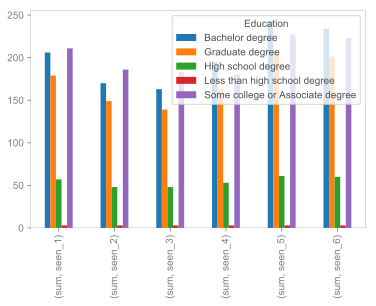

In [207]:
seen_edu = pd.pivot_table(star_wars,index=["Education"],values=seen_cols, \
                          aggfunc=[np.sum],fill_value=0)

seen_edu.transpose().plot(kind='bar')